## Assignment 7.2
### Exercises 7 - 1, 8 - 1, and 8 - 2

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Imports
import nsfg
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import thinkstats2
import thinkplot
import random
import pandas as pd

## Exercise 7 - 1

*Using data from the NSFG, make a scatter plot of birth weight versus mother's age. Plot percentiles of birth weight versus mother's age. Compute Pearson's and Spearman's correlations. How would you characterize the relationshp between these variables?*

In [2]:
# Read the Female Pregnancy Dataset
preg_df = nsfg.ReadFemPreg()
preg_df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Text(0, 0.5, 'Birth Weight (lbs)')

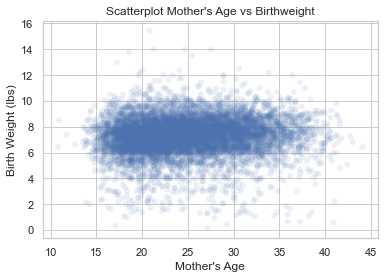

In [3]:
# Scatter Plot of Birth Weight vs Mother's Age
sns.set(style = 'whitegrid')
sns.scatterplot(x = 'agepreg', y = 'totalwgt_lb', data = preg_df, edgecolor = 'none', alpha = 0.1)
plt.title("Scatterplot Mother's Age vs Birthweight")
plt.xlabel("Mother's Age")
plt.ylabel("Birth Weight (lbs)")

In [4]:
# Plot percentiles of birth weight versus mother's age

# drop and rows that are missing from age and birth weight
cleanedPreg_df = preg_df.dropna(subset = ['agepreg', 'totalwgt_lb'])
cleanedPreg_df[['agepreg', 'totalwgt_lb']].head()

,agepreg,totalwgt_lb
0,33.16,8.8125
1,39.25,7.8750
2,14.33,9.1250
3,17.83,7.0000
4,18.33,6.1875


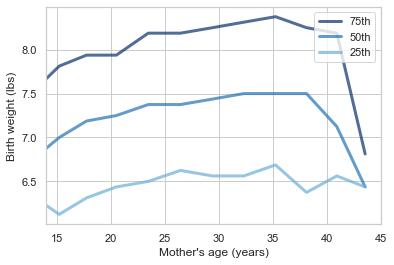

In [5]:
# create values from 10 to 48 with stepsize of 3
bins = np.arange(10, 48, 3)

# put age into correct bins giving an array of bin numbers
indices = np.digitize(cleanedPreg_df.agepreg, bins)

# get count of each bin number
groups = cleanedPreg_df.groupby(indices)

# get the mean of the ages for each group 
ages = [group.agepreg.mean() for i, group in groups]

cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)

thinkplot.Config(xlabel="Mother's age (years)",
                 ylabel='Birth weight (lbs)',
                 xlim=[14, 45], legend=True)

In [6]:
# Compute Spearman's correlations
spearman_corr = preg_df['agepreg'].corr(preg_df['totalwgt_lb'], method="spearman")
spearman_corr

0.09461004109658226

In [7]:
# Compute Pearson's correlations
pearson_corr = preg_df['agepreg'].corr(preg_df['totalwgt_lb'])
pearson_corr

0.0688339703541091

The scatterplot really doesnt show a relationship between the mother's age and birth weight

Plotting the percentiles shows us that between about 15 and 25 the birth weight increases but then flattens out as the mother gets older

Spearman's correlation of 0.09 is higher than Pearson's of 0.07 which suggests that Pearson's may have some influence with the outliers in the data and it is nonlinear.

## Exercise 8 - 1

*In this chapter we used $\bar{x}$ and median to estimate $\mu$, and found that $\bar{x}$ yields lower MSE. Also we used $S^2$ and $S^2_{n-1}$ to estimate $\sigma$. and found that $S^2$ is biased and  $S^2_{n-1}$ is unbiased.*

*Run similar experiments to see if $\bar{x}$ and median are biased estimates of $\sigma$. Also, check whether $S^2$ or $S^2_{n-1}$ yields a lower MSE.*

In [8]:
# Mean Error
def MeanError(estimates, actual):
    '''
    Computer the mean error
    
    args:
        estimates
        actual
        
    return:
        meanerror (float)
    '''
    errors = [estimate - actual for estimate in estimates]
    
    meanerror = np.mean(errors)
    
    return meanerror

In [9]:
# Computer the Mean error for xbar and median
mu = 0
sigma = 1

means = []
medians = []

for _ in range(10000):
    xs = [random.gauss(mu, sigma) for i in range(7)]
    
    xbar = np.mean(xs)
    median = np.median(xs)
    
    means.append(xbar)
    medians.append(median)
    
    meanerror_xbar = MeanError(means, mu)
    meanerror_median = MeanError(medians, mu)
    
print(f"Mean error xbar: {meanerror_xbar}")
print(f"Mean error median: {meanerror_median}")

Mean error xbar: 0.0016613181340424169
Mean error median: 0.002294888533449747


In [10]:
# Computer the Root Mean Squared Error for biased and unbiased
mu = 0
sigma = 1

biasedEstimate = []
unbiasedEstimate = []

for _ in range(10000):
    xs = [random.gauss(mu, sigma) for i in range(7)]
    
    biased = np.var(xs)
    unbiased = np.var(xs, ddof = 1)
    
    biasedEstimate.append(biased)
    unbiasedEstimate.append(unbiased)
    
    biased_mean = MeanError(biasedEstimate, sigma**2)
    unbiased_mean = MeanError(unbiasedEstimate, sigma**2)
    
print(f"Mean error biased: {biased_mean}")
print(f"Mean error unbiased: {unbiased_mean}")

Mean error biased: -0.15535940381359506
Mean error unbiased: -0.014585971115860897


- Iterations = 1000: xbar = 0.38 and median = 0.46
- Iterations = 10000: xbar = -0.001 and median = -0.007
    - The xbar and median mean error trends lower as the number of iterations increases so neither is biased by the other.

- Iterations = 1000: biased = 0.50  and unbiased = 0.56
- Iterations = 10000: biased = 0.52  and unbiased = 0.58
    - The biased estimate is lower than the unbiased at iterations of 1000 and at 10000.

## Exercise 8 - 2

*Suppose that you draw a sample with size n = 10 from an exponential distribution with $\lambda$ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.*

*Repeat the experiment with a few different values of n and make a plot of standard error versus n*

In [11]:
def RMSE(estimates, actual):
    """
    Computes the root mean squared error of a sequence of estimates.

    args:
        estimate: sequence of numbers
        actual: actual value

    returns: 
        rmse (float)
    """
    e2 = [(estimate - actual)**2 for estimate in estimates]
    
    mse = np.mean(e2)
    
    rmse = np.sqrt(mse)
    
    return rmse

standard error: 0.7693905448431435
confidence interval: (1.2478713820725387, 3.1618136208078025)


0.7693905448431435

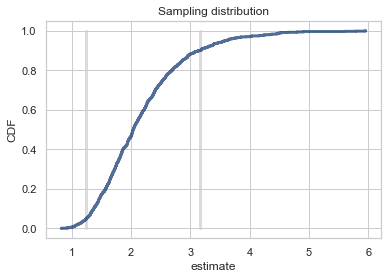

In [12]:
def SimulateSample(lam = 2, n = 10, iters = 1000):
    """
    Sampling distribution of L as an estimator of exponential parameter.

    args:
        lam (int): parameter of an exponential distribution
        n(int): sample size    
        iters(int): number of iterations
        
    returns:
        stderr
    """
    def VertLine(x, y = 1):
        thinkplot.Plot([x, x], [0, y], color = '0.8', linewidth = 3)

    estimates = []
    
    for _ in range(iters):
        xs = np.random.exponential(1.0 / lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print(f'standard error: {stderr}')

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(90)
    print(f'confidence interval: {ci}')
    
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()

standard error: 0.200644277397404
confidence interval: (1.703418000368407, 2.276468494274745)


0.200644277397404

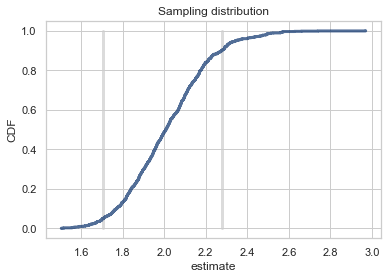

In [13]:
SimulateSample(n = 100)

standard error: 0.062084049130931906
confidence interval: (1.8972273075839077, 2.0828809333008373)


0.062084049130931906

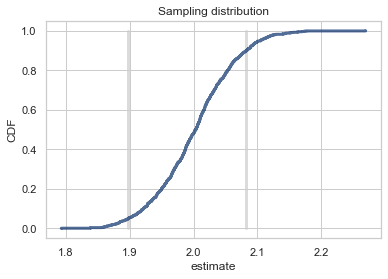

In [14]:
SimulateSample(n = 1000)

| Sample Size | Std Error | Interval | Distance |
| --- | --- | --- | --- |
| 10 | 0.84 | 1.32 - 3.32 | 2.0 |
| 100 | 0.20 | 1.71 - 2.28 | 0.57 |
| 1000 | 0.06 | 1.90 - 2.08 | 0.18 |

With a 90% confidence level, as the sample size increases the standard error decreases along with the width of the confidence interval.